In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
import seaborn as sns
from PIL import Image
import glob

In [5]:
import jupyterthemes

In [6]:
jt [-1]

NameError: name 'jt' is not defined

In [2]:
lung_data_path = r"C:\Users\vulo\OneDrive\Documents\GitHub\W207-Spring-2023\Final Project\Dataset\lung_colon_image_set\lung_image_sets"
colon_data_path = r"C:\Users\vulo\OneDrive\Documents\GitHub\W207-Spring-2023\Final Project\Dataset\lung_colon_image_set\colon_image_sets"


colon_path_aca = r'\colon_image_sets\colon_aca'
colon_path_n = r'\colon_image_sets\colon_n'
lung_path_aca = r'\lung_image_sets\lung_aca'
lung_path_n = r'\lung_image_sets\lung_n'
lung_path_scc = r'\lung_image_sets\lung_scc'




In [3]:
# Setting up class
class_image = ['lung_aca','lung_n','lung_scc', 'colon_aca','colon_n']
cancer_class = ['Lung_Adenocarcinoma','Lung_Normal','Lung_Squamous_Cell_Carcinoma','Colon_Adenocarcinoma','Colon_Normal']


In [4]:
# Create training dataset for lung dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = lung_data_path, 
    batch_size = 25, 
    image_size = (128,128), 
    class_names = class_image,
    seed = 42, 
    subset = 'training',
    validation_split = 0.2)


Found 25000 files belonging to 5 classes.
Using 20000 files for training.


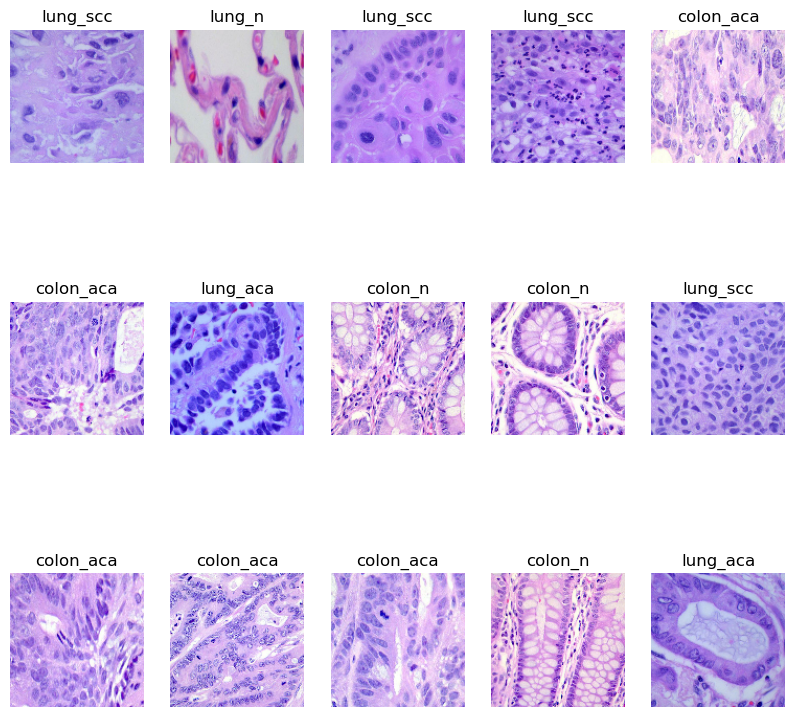

In [5]:
# Display the first 9 images 
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
for images, labels in train_ds.take(1): 
    for i in range(15):
        ax = plt.subplot(3,5, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_image[labels[i]])
        plt.axis('off')

In [6]:
for image_batch, label_batch in train_ds: 
    display(image_batch.shape)
    display(label_batch.shape)
    break

TensorShape([25, 128, 128, 3])

TensorShape([25])

In [7]:
# Create testing dataset for lung dataset 
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = lung_data_path, 
    batch_size = 25, 
    image_size = (128,128), 
    class_names = class_image, 
    seed = 42, 
    subset = 'validation', 
    validation_split = 0.2)

Found 25000 files belonging to 5 classes.
Using 5000 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['lung_aca', 'lung_n', 'lung_scc', 'colon_aca', 'colon_n']


In [9]:
# Autotune to increase computer performance on image processing
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)


In [10]:
# Standardization on lung dataset
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
#image_batch, labels_batch = next(iter(normalized_lung_train_ds))
#first_image = image_batch[0]
#print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [12]:
# Create a simple CNN model 
num_lung_classes = len(class_names)
model = tf.keras.Sequential([
    keras.layers.Rescaling(1./255, input_shape=(128, 128, 3)),
    keras.layers.Conv2D(16, 3, padding = 'same', activation = 'relu'), 
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding = 'same', activation = 'relu'), 
    keras.layers.MaxPooling2D(), 
    keras.layers.Conv2D(64, 4, padding = 'same', activation = 'relu'), 
    keras.layers.MaxPooling2D(), 
    keras.layers.Flatten(), 
    keras.layers.Dense(128, activation = 'relu'), 
    keras.layers.Dense(num_lung_classes) 
])

model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        3

In [13]:
# Train the model
epochs = 10 
history = model.fit(
train_ds, 
validation_data = test_ds, 
epochs = epochs
)

Epoch 1/10
800/800 [==============================] - 169s 187ms/step - loss: 0.5212 - accuracy: 0.7648 - val_loss: 0.3125 - val_accuracy: 0.8752
Epoch 2/10
800/800 [==============================] - 145s 182ms/step - loss: 0.2458 - accuracy: 0.8996 - val_loss: 0.2113 - val_accuracy: 0.9150
Epoch 3/10
800/800 [==============================] - 150s 188ms/step - loss: 0.1513 - accuracy: 0.9420 - val_loss: 0.1528 - val_accuracy: 0.9390
Epoch 4/10
800/800 [==============================] - 152s 190ms/step - loss: 0.0970 - accuracy: 0.9625 - val_loss: 0.1765 - val_accuracy: 0.9324
Epoch 5/10
800/800 [==============================] - 144s 180ms/step - loss: 0.0800 - accuracy: 0.9699 - val_loss: 0.1293 - val_accuracy: 0.9522
Epoch 6/10
800/800 [==============================] - 139s 174ms/step - loss: 0.0483 - accuracy: 0.9838 - val_loss: 0.1633 - val_accuracy: 0.9458
Epoch 7/10
800/800 [==============================] - 138s 172ms/step - loss: 0.0388 - accuracy: 0.9866 - val_loss: 0.1142 -

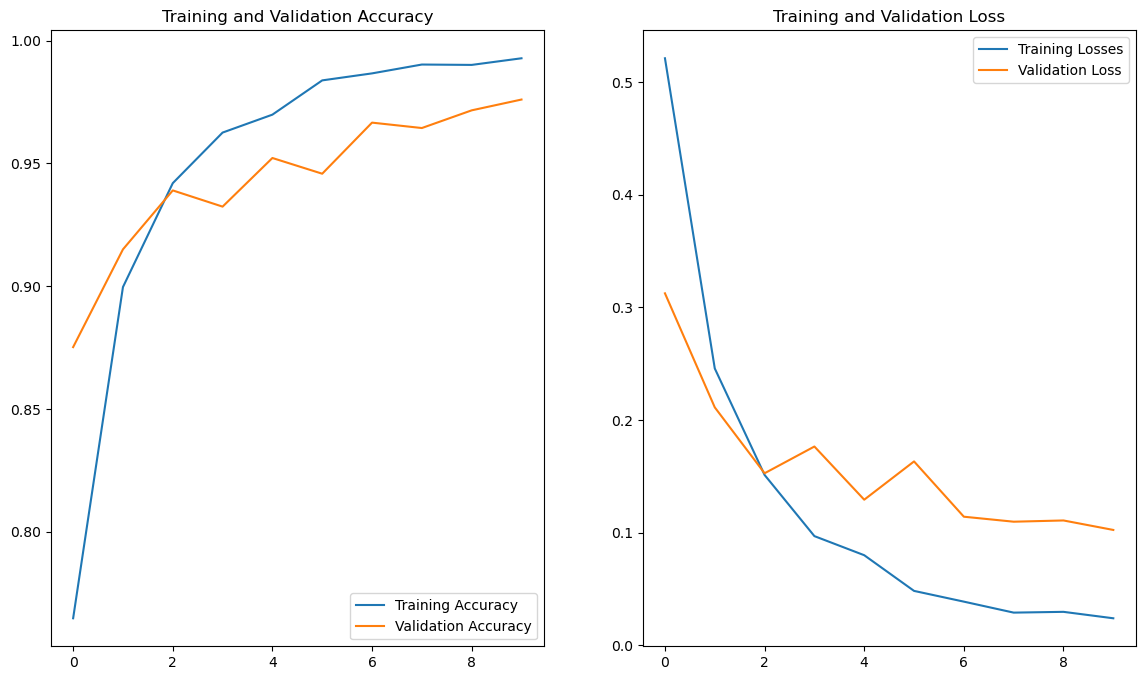

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize = (14,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2) 
plt.plot(epochs_range, loss, label = 'Training Losses')
plt.plot(epochs_range, val_loss, label = 'Validation Loss') 
plt.legend(loc = 'upper right') 
plt.title('Training and Validation Loss')
plt.show()

In [15]:
# Predicting the modeling 
pred = np.argmax(model.predict(test_ds), axis = -1)
# Add confusion matrix 
# ROC curve 
# AUC curve
print(pred)

200/200 [==============================] - 8s 40ms/step
[1 4 2 ... 0 2 2]


In [16]:
# Extract y label in test dataset 
y_test = tf.concat([y for x, y in test_ds], axis=0)
y_test = np.array(y_test)

y_train = tf.concat([y for x, y in train_ds], axis = 0)
y_train = np.array(y_train)
y_train.shape

(20000,)

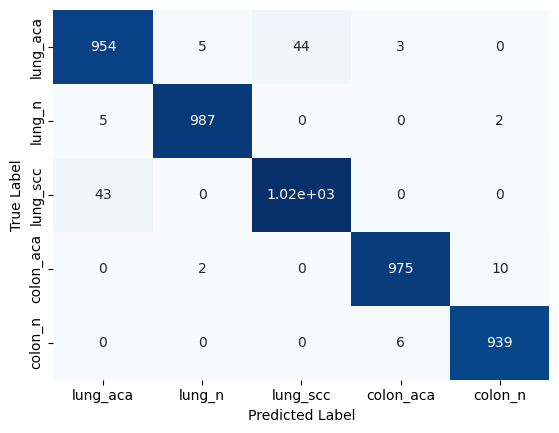

In [17]:
# Extract y label in test dataset 
y_test = tf.concat([y for x, y in test_ds], axis=0)
y_test = np.array(y_test)

# Confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, pred)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=class_image, yticklabels=class_image, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()


ROC AUC score: 0.9852340791665914


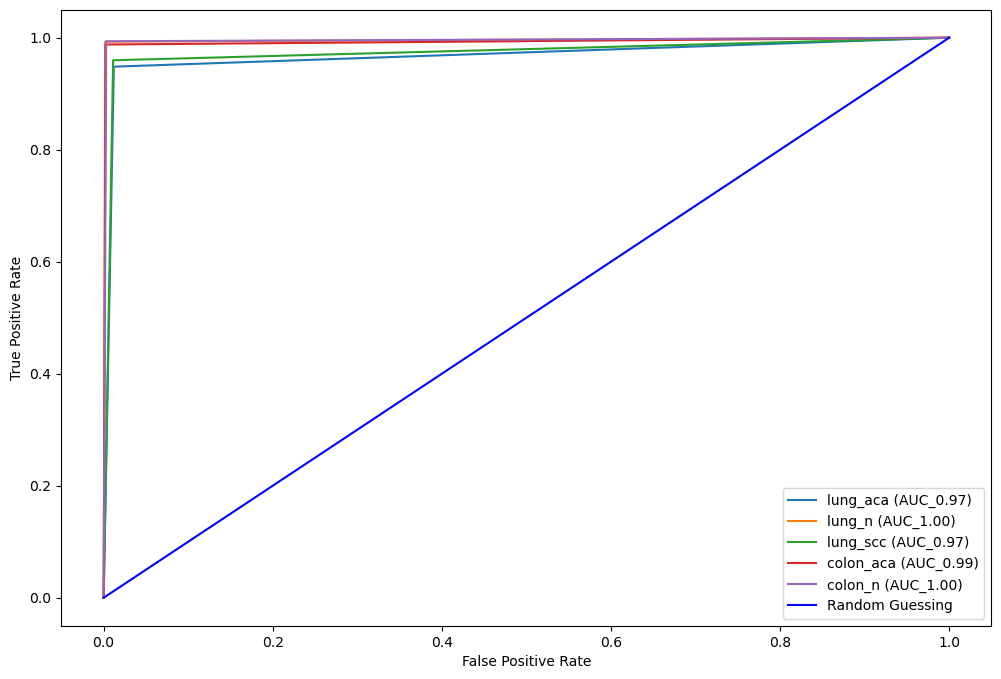

In [18]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Plot linewidth.
lw = 2

# set plot figure size 
fig, c_ax = plt.subplots(1,1, figsize = (12,8))

# function for scoring roc auc score for multi-class 
def multiclass_roc_auc_score(y_test, pred, average = 'macro'):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    pred = lb.transform(pred)
    
    for (idx, c_label) in enumerate(class_image):
        fpr, tpr, thresholds = roc_curve(y_test[:, idx].astype(int), pred[:, idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC_%0.2f)' % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, pred, average = average)

print('ROC AUC score:', multiclass_roc_auc_score(y_test, pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()
